In [30]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:

'''
Parametros de amber de Julian 
AMBER Barrier (kcal/mol)
/hpcfs/home/dr.figueroa10/FFParmOpt/DATOS_Pre/STX_1.frcmod 

parametrizado con GAFF2 y metodologia RESP para las cargas (.log en archivos)

o -c -ce-cf   4(multiplicad)    8.700       180.000           2.000
O3-C2-C1-C77 ( en atom index )
parametros para el dihedoro analizado en O5 C22 C23 C24

Documentacion de parametros de amber. (cluster)
vi /lustre/apps/anaconda/2/envs/18-amber/dat/leap/parm/gaff2.dat


Parametros de CHARMM 

/home/UANDES/dr.figueroa10/Documentos/FFParams/JohnErick/PARAMSCHARMGUI/STX_charmm/gromacs
grep CG2DC1 charmm36_new.itp  | grep OG2D1

CG2DC1  CG2DC1   CG2O2   OG2D1     9  1.800000e+02  5.857600e+00      2(multiplicad)

'''


'\nParametros de amber de Julian \nAMBER Barrier (kcal/mol)\n/hpcfs/home/dr.figueroa10/FFParmOpt/DATOS_Pre/STX_1.frcmod \n\nparametrizado con GAFF2 y metodologia RESP para las cargas (.log en archivos)\n\no -c -ce-cf   4(multiplicad)    8.700       180.000           2.000\nO3-C2-C1-C77 ( en atom index )\nparametros para el dihedoro analizado en O5 C22 C23 C24\n\nDocumentacion de parametros de amber. (cluster)\nvi /lustre/apps/anaconda/2/envs/18-amber/dat/leap/parm/gaff2.dat\n\n\nParametros de CHARMM \n\n/home/UANDES/dr.figueroa10/Documentos/FFParams/JohnErick/PARAMSCHARMGUI/STX_charmm/gromacs\ngrep CG2DC1 charmm36_new.itp  | grep OG2D1\n\nCG2DC1  CG2DC1   CG2O2   OG2D1     9  1.800000e+02  5.857600e+00      2(multiplicad)\n\n'

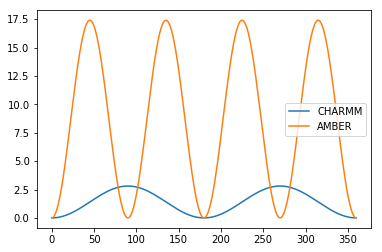

In [32]:
def dieh_CHARM(theta,phi,n,k):
    dihedral_CHARM = k*(1+np.cos((n*theta-phi)*np.pi/180))
    plt.plot(thetha,dihedral_CHARM,label="CHARMM")
    plt.grid()
    #return deihdral
def dieh_AMBER(theta,phi,n,k):
    dihedral_AMBER = k*(1+np.cos((n*theta-phi)*np.pi/180))
    plt.plot(thetha,dihedral_AMBER,label="AMBER")
    plt,legend()
    plt.grid()
thetha= np.arange(0,360,0.1)
dieh_CHARM(thetha,180,2,(5.875/4.186))
dieh_AMBER(thetha,180,4,8.7)

In [33]:
### read_scan

In [34]:
lines = [line.rstrip('\n') for line in open('qm_data.dat')]

In [35]:
max(lines)

'-2592.21827'

In [36]:
indexes = [i for i, x in enumerate(lines) if x == max(lines)]
indexes

[25]

In [37]:
lines

['-2592.21826',
 '-2592.21768',
 '-2592.21601',
 '-2592.21333',
 '-2592.21006',
 '-2592.20717',
 '-2592.20578',
 '-2592.20676',
 '-2592.20955',
 '-2592.21287',
 '-2592.21562',
 '-2592.21739',
 '-2592.2182',
 '-2592.21813',
 '-2592.21721',
 '-2592.21535',
 '-2592.2125',
 '-2592.20916',
 '-2592.20643',
 '-2592.20563',
 '-2592.20718',
 '-2592.2102',
 '-2592.21349',
 '-2592.21611',
 '-2592.21775',
 '-2592.21827']

In [38]:
lines[25]

'-2592.21827'

In [47]:
val_qm = []
for i in lines:
    print ((float(i)-float(lines[25]))*627.5)
    val_qm.append((float(i)-float(lines[25]))*627.5)
len(val_qm)

0.006274999841480167
0.37022499977865664
1.418149999843763
3.099849999878188
5.151774999976624
6.965249999821026
7.837475000044378
7.222524999884854
5.471799999882023
3.388500000005479
1.6628749999392767
0.5522000000325988
0.04392500003177702
0.08784999977820007
0.6651500000327815
1.8322999999395506
3.620674999847324
5.716524999977537
7.429599999790071
7.9315999999494124
6.958974999979546
5.06392499991307
2.9994499998463198
1.3554000000021915
0.3263000000322336
0.0


26

In [48]:
dieh = np.arange(-179.54,190,14.4)
len(dieh)

26

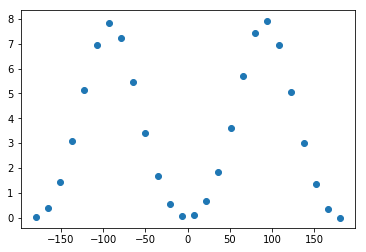

In [49]:
plt.scatter(dieh,val_qm)